In [4]:
import pandas as pd
import sqlite3

con = sqlite3.connect('main.db')

data_sql = 'select * from files where project_id in (1,2)'
df = pd.read_sql(data_sql, con)
print(df.tail())


    id                     path  byte_count  project_id
49  50  src/flask/templating.py        5626           2
50  51     src/flask/testing.py       10281           2
51  52      src/flask/typing.py        1982           2
52  53       src/flask/views.py        5948           2
53  54    src/flask/wrappers.py        5604           2


<AxesSubplot:xlabel='id', ylabel='byte_count'>

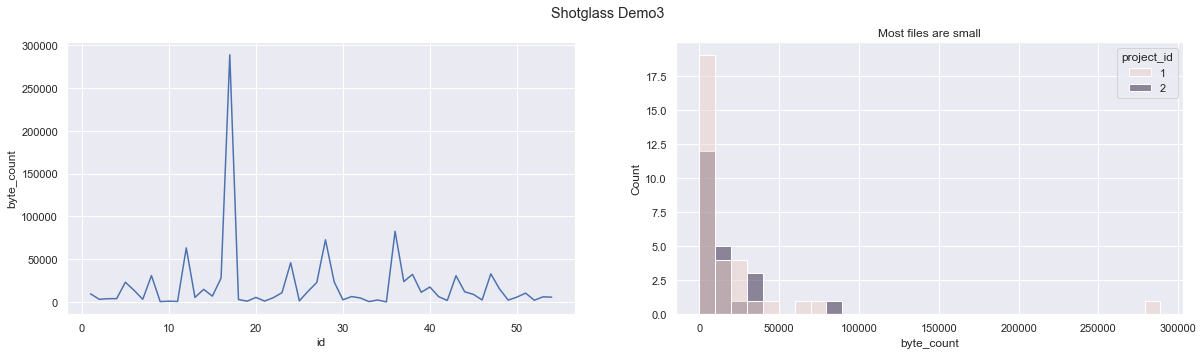

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt  # TODO: remove?

# sns.set_theme(style="darkgrid")
# sns.color_palette("pastel")


fig, axs = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Shotglass Demo3')

hist_p = sns.histplot(data=df, x="byte_count", hue="project_id") # , hue="species", multiple="stack")
hist_p.set(title="Most files are small")

# sns.scatterplot(x="id", y="byte_count", data=df, ax=axs[0]) # hue="sex", 
sns.lineplot(x="id", y="byte_count", data=df, ax=axs[0])